In [1]:
from google.colab import files
uploaded = files.upload()

Saving polynomial-regression.csv to polynomial-regression.csv


MSE Promedio: 516951.13969465654
Coeficientes del Mejor Modelo: [ 1.29594714e+02  7.58590837e-01 -8.29258846e-04  3.61276950e-07
 -5.34744206e-11].


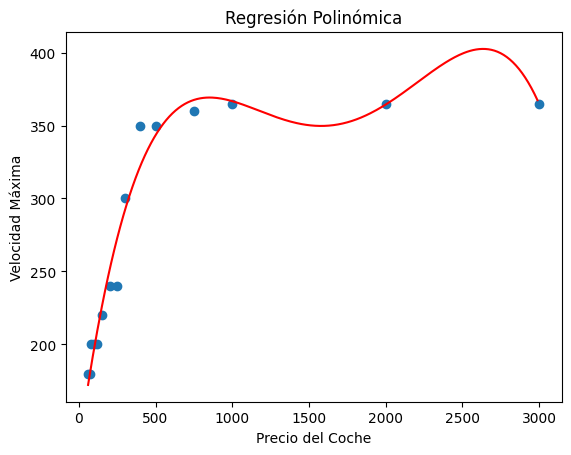

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargar datos
data = pd.read_csv('polynomial-regression.csv')
features = data.iloc[:, 0].values
target = data.iloc[:, 1].values

def polynomial_regression(X, y, degree=1):
    # Crear características polinómicas
    X_poly = np.column_stack([X ** d for d in range(1, degree + 1)])
    # Agregar una columna de unos para el término independiente
    ones_column = np.ones((X_poly.shape[0], 1))
    X_poly = np.column_stack([ones_column, X_poly])
    # Calcular los coeficientes usando la fórmula de regresión polinómica
    coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return coefficients

# Cálculo del Error Cuadrático Medio
def mean_squared_error(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

# Validación Cruzada Leave One Out
def leave_one_out_cv(X):
    indices = np.arange(len(X))
    for test_index in range(len(X)):
        test_mask = np.zeros(len(X), dtype=bool)
        test_mask[test_index] = True
        train_index = indices[np.logical_not(test_mask)]
        test_index = indices[test_mask]
        yield train_index, test_index

# Encontrar el mejor modelo usando Validación Cruzada Leave One Out
min_error = np.Inf
best_coeffs = None
errors = []

for train_idx, test_idx in leave_one_out_cv(features):
    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test = features[train_idx], features[test_idx]
    y_train, y_test = target[train_idx], target[test_idx]

    # Entrenar el modelo de regresión polinómica de grado 4
    coeffs = polynomial_regression(X_train, y_train, degree=4)
    # Predecir con el modelo entrenado usando las características de prueba
    predicted_values = np.dot(np.column_stack([X_test ** d for d in range(1, 5)]), coeffs[1:]) + coeffs[0]

    # Calcular el error cuadrático medio y almacenarlo
    error = mean_squared_error(y_test, predicted_values)
    errors.append(error)

    # Actualizar el mejor modelo si se encuentra un error más bajo
    if error < min_error:
        min_error = error
        best_coeffs = coeffs

# Mostrar resultados
print(f'MSE Promedio: {np.mean(errors)}')
print(f'Coeficientes del Mejor Modelo: {best_coeffs}.')

# Visualización de los puntos originales y la línea de regresión polinómica
X_min = features.min()
X_max = features.max()
x = np.arange(X_min, X_max, 10)
y = np.dot(np.column_stack([x ** d for d in range(1, 5)]), best_coeffs[1:]) + best_coeffs[0]

plt.scatter(features, target)
plt.plot(x, y, c="red")
plt.xlabel('Precio del Coche')
plt.ylabel('Velocidad Máxima')
plt.title('Regresión Polinómica')
plt.show()